### Importación de datos



In [1]:
import pandas as pd  # Pandas manipula datos en forma de tablas (Dataframe)

# Guardando en variables los link del los csv
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Guardando en las variables tiendas los dataframe que pd.read_csv lee de las url
tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)
# muestra los5 primeros filas por default
tienda2.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359
2,Cama king,Muebles,443300.0,23800.0,22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81333,-75.69611
3,Cama king,Muebles,906200.0,46400.0,04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250
4,Silla de oficina,Muebles,397800.0,19400.0,26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175


#1. Análisis de facturación



In [2]:
# sumando los Precios de cada Tienda
Venta_total = tienda["Precio"].sum()
Venta_total2 = tienda2["Precio"].sum()
Venta_total3 = tienda3["Precio"].sum()
Venta_total4 = tienda4["Precio"].sum()

In [3]:
#guardando el df en ingresos, los valores salen en notación cientifica por que son números grandes
ingresos = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Venta Total": [Venta_total, Venta_total2, Venta_total3, Venta_total4]
})

print(ingresos)

     Tienda   Venta Total
0  Tienda 1  1.150880e+09
1  Tienda 2  1.116344e+09
2  Tienda 3  1.098020e+09
3  Tienda 4  1.038376e+09


In [4]:
#Poniendo las decimales a Venta total para que no salga con notación cientifica, por eso usamos el lambda
ingresos["Venta Total"] = ingresos["Venta Total"].apply(lambda x: f"{x:,.2f}")
print(ingresos)

     Tienda       Venta Total
0  Tienda 1  1,150,880,400.00
1  Tienda 2  1,116,343,500.00
2  Tienda 3  1,098,019,600.00
3  Tienda 4  1,038,375,700.00


In [5]:
# Eliminar comas y convertir a float
ingresos["Venta Total"] = ingresos["Venta Total"].replace(",", "", regex=True).astype(float)

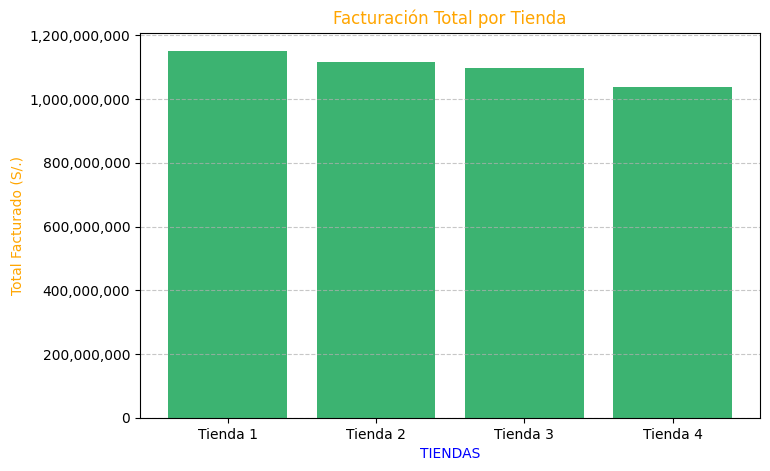

In [7]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter # formater para que salga el total facturado completo

# Convertir valores a float si están en string
ingresos["Venta Total"] = ingresos["Venta Total"].replace(",", "", regex=True).astype(float)

# Crear gráfico
plt.figure(figsize=(8, 5))
plt.bar(ingresos["Tienda"], ingresos["Venta Total"], color='mediumseagreen')
plt.title("Facturación Total por Tienda", color="orange")
plt.xlabel("TIENDAS", color="blue")
plt.ylabel("Total Facturado (S/.)", color="orange")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Formatear eje Y para mostrar números completos con comas
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

# 2. Ventas por categoría

In [8]:
#Agrupando categoria y precio
Ventas_por_categoria = tienda.groupby("Categoría del Producto")["Precio"].sum().reset_index()
Ventas_por_categoria2 = tienda2.groupby("Categoría del Producto")["Precio"].sum().reset_index()
Ventas_por_categoria3 = tienda3.groupby("Categoría del Producto")["Precio"].sum().reset_index()
Ventas_por_categoria4 = tienda4.groupby("Categoría del Producto")["Precio"].sum().reset_index()

# es mejor el print separado el comentario del dataframe, sino hasta sale error
print("Ventas por categoría - Tienda 1")
print(Ventas_por_categoria)

print("\nVentas por categoría - Tienda 2")
print(Ventas_por_categoria2)

print("\nVentas por categoría - Tienda 3")
print(Ventas_por_categoria3)

print("\nVentas por categoría - Tienda 4")
print(Ventas_por_categoria4)
# Hasta aqui nos muestra las ventas por categoria separadas, abajo los agrupamos

Ventas por categoría - Tienda 1
    Categoría del Producto       Precio
0  Artículos para el hogar   12698400.0
1     Deportes y diversión   39290000.0
2        Electrodomésticos  363685200.0
3             Electrónicos  429493500.0
4   Instrumentos musicales   91299000.0
5                 Juguetes   17995700.0
6                   Libros    8784900.0
7                  Muebles  187633700.0

Ventas por categoría - Tienda 2
    Categoría del Producto       Precio
0  Artículos para el hogar   14746900.0
1     Deportes y diversión   34744500.0
2        Electrodomésticos  348567800.0
3             Electrónicos  410831100.0
4   Instrumentos musicales  104990300.0
5                 Juguetes   15945400.0
6                   Libros   10091200.0
7                  Muebles  176426300.0

Ventas por categoría - Tienda 3
    Categoría del Producto       Precio
0  Artículos para el hogar   15060000.0
1     Deportes y diversión   35593100.0
2        Electrodomésticos  329237900.0
3             Electrón

In [9]:
# Agrupando todas las Tiendas por categoria
Ventas_por_categoria["Tienda"] = "Tienda 1"
Ventas_por_categoria2["Tienda"] = "Tienda 2"
Ventas_por_categoria3["Tienda"] = "Tienda 3"
Ventas_por_categoria4["Tienda"] = "Tienda 4"

In [10]:
#concatenamos las Tiendas
ventas_unificadas = pd.concat([
    Ventas_por_categoria,
    Ventas_por_categoria2,
    Ventas_por_categoria3,
    Ventas_por_categoria4
], ignore_index=True)# reinicia el indice para que sea continuo

In [11]:
# Mostramos la concatenación de las tiendas
print("Ventas por Categorías Unificadas: ")
print(ventas_unificadas)

Ventas por Categorías Unificadas: 
     Categoría del Producto       Precio    Tienda
0   Artículos para el hogar   12698400.0  Tienda 1
1      Deportes y diversión   39290000.0  Tienda 1
2         Electrodomésticos  363685200.0  Tienda 1
3              Electrónicos  429493500.0  Tienda 1
4    Instrumentos musicales   91299000.0  Tienda 1
5                  Juguetes   17995700.0  Tienda 1
6                    Libros    8784900.0  Tienda 1
7                   Muebles  187633700.0  Tienda 1
8   Artículos para el hogar   14746900.0  Tienda 2
9      Deportes y diversión   34744500.0  Tienda 2
10        Electrodomésticos  348567800.0  Tienda 2
11             Electrónicos  410831100.0  Tienda 2
12   Instrumentos musicales  104990300.0  Tienda 2
13                 Juguetes   15945400.0  Tienda 2
14                   Libros   10091200.0  Tienda 2
15                  Muebles  176426300.0  Tienda 2
16  Artículos para el hogar   15060000.0  Tienda 3
17     Deportes y diversión   35593100.0  Tiend

In [13]:
#Cambiando String a float de Precio
ventas_unificadas["Precio"] = ventas_unificadas["Precio"].replace(",", "", regex=True).astype(float)

In [14]:
print(ventas_unificadas.groupby(["Tienda", "Categoría del Producto"])["Precio"].sum())

Tienda    Categoría del Producto 
Tienda 1  Artículos para el hogar     12698400.0
          Deportes y diversión        39290000.0
          Electrodomésticos          363685200.0
          Electrónicos               429493500.0
          Instrumentos musicales      91299000.0
          Juguetes                    17995700.0
          Libros                       8784900.0
          Muebles                    187633700.0
Tienda 2  Artículos para el hogar     14746900.0
          Deportes y diversión        34744500.0
          Electrodomésticos          348567800.0
          Electrónicos               410831100.0
          Instrumentos musicales     104990300.0
          Juguetes                    15945400.0
          Libros                      10091200.0
          Muebles                    176426300.0
Tienda 3  Artículos para el hogar     15060000.0
          Deportes y diversión        35593100.0
          Electrodomésticos          329237900.0
          Electrónicos             

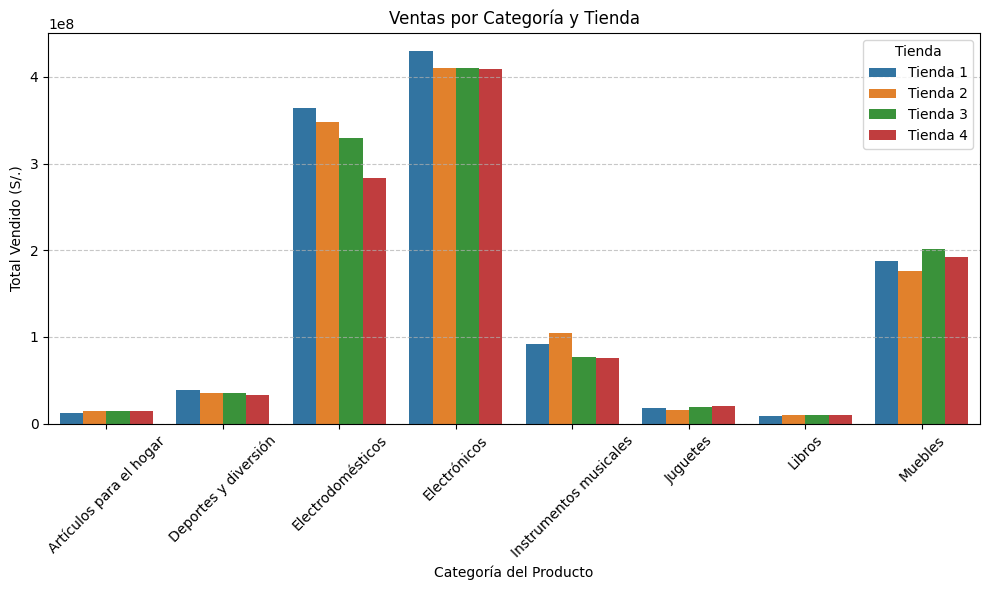

In [15]:
#Gráfico por categoría y Tienda
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de tener seaborn instalado: pip install seaborn

# Crear gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
sns.barplot(data=orden_columna, x="Categoría del Producto", y="Precio", hue="Tienda")

# Personalizar gráfico
plt.title("Ventas por Categoría y Tienda")
plt.xlabel("Categoría del Producto")
plt.ylabel("Total Vendido (S/.)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend(title="Tienda")

plt.tight_layout()
plt.show()

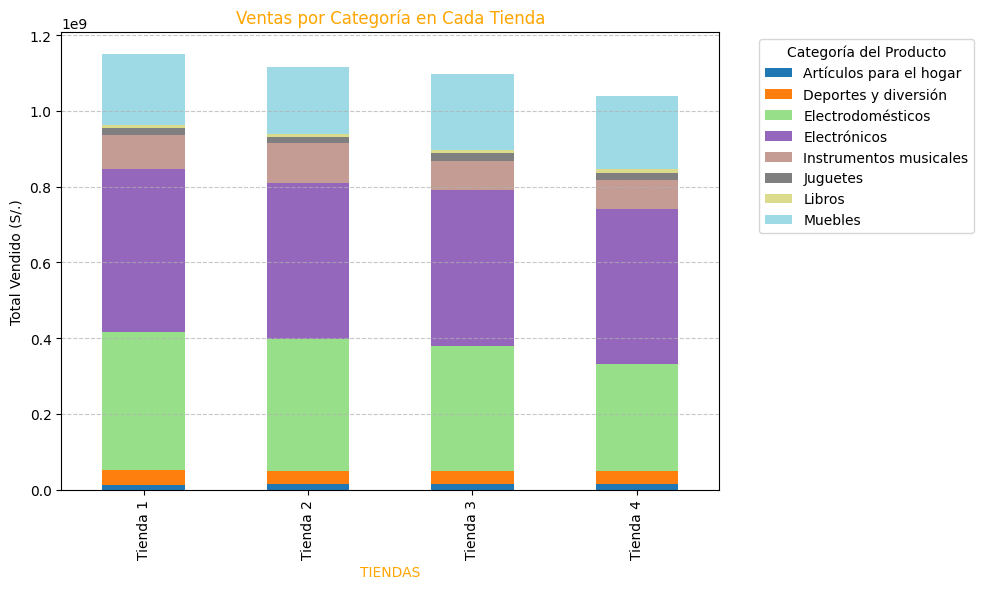

In [31]:
# gráfico por categoría en cada Tienda
import matplotlib.pyplot as plt

# Pivotear el DataFrame para tener categorías como columnas
pivot_df = orden_columna.pivot(index="Tienda", columns="Categoría del Producto", values="Precio").fillna(0)

# Crear gráfico apilado
pivot_df.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="tab20")

# Personalizar gráfico
plt.title("Ventas por Categoría en Cada Tienda", color="orange")
plt.xlabel("TIENDAS", color="orange")
plt.ylabel("Total Vendido (S/.)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Categoría del Producto", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

# 3. Calificación promedio de la tienda


In [17]:
#Promedio con mean()
promedio = tienda["Calificación"].mean()
promedio2 = tienda2["Calificación"].mean()
promedio3 = tienda3["Calificación"].mean()
promedio4 = tienda4["Calificación"].mean()

In [18]:
# sale bien el promedio de cada tienda pero con varios decimales, abajo lo ponemos a 2 decimales
#creamos dataframe promedios con sus columnas: Tienda y Promedio
promedios = pd.DataFrame({
    "Tienda": ["Tienda 1: ", "Tienda 2: ", "Tienda 3: ", "tienda 4: "],
    "Promedio": [promedio, promedio2, promedio3, promedio4]
})
print("Promedios de la Calificación: ")
print(promedios)

Promedios de la Calificación: 
       Tienda  Promedio
0  Tienda 1:   3.976685
1  Tienda 2:   4.037304
2  Tienda 3:   4.048326
3  tienda 4:   3.995759


In [19]:
#Usamos la columna Promedio del dataframe promedios y redondeamos a dos decimales ese Promedio
promedios["Promedio"] = promedios["Promedio"].apply(lambda x: round(x, 2))
print(promedios)

       Tienda  Promedio
0  Tienda 1:       3.98
1  Tienda 2:       4.04
2  Tienda 3:       4.05
3  tienda 4:       4.00


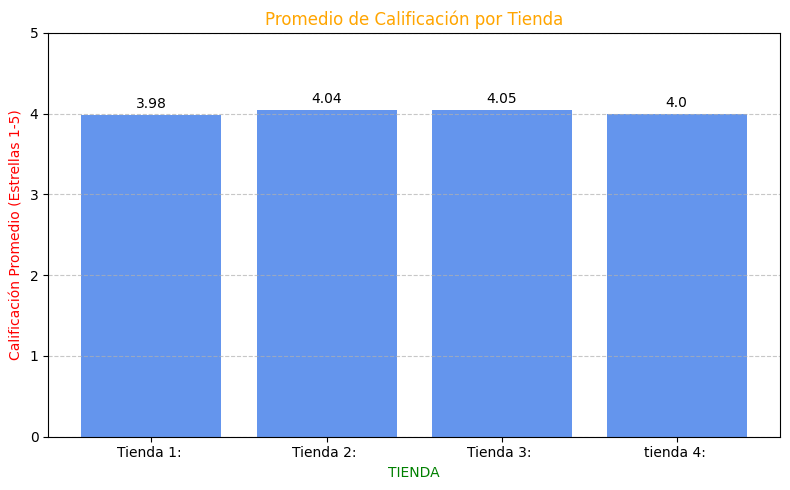

In [34]:
import matplotlib.pyplot as plt

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(promedios["Tienda"], promedios["Promedio"], color='cornflowerblue')

# Personalizar gráfico
plt.title("Promedio de Calificación por Tienda", color="orange")
plt.xlabel("TIENDA", color="green")
plt.ylabel("Calificación Promedio (Estrellas 1-5)", color="red")
plt.ylim(0, 5)  # Asumiendo que la calificación es sobre 5
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar etiquetas encima de cada barra
for i, valor in enumerate(promedios["Promedio"]):
    plt.text(i, valor + 0.05, str(valor), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [21]:
# Producto más caro (más vendido en valor)
producto_mas_vendido = tienda[tienda["Precio"] == tienda["Precio"].max()]

# Producto más barato (menos vendido en valor)
producto_menos_vendido = tienda[tienda["Precio"] == tienda["Precio"].min()]

In [22]:
# aca solo hicimos de 1 dataframe, abajo lo hicimos de los 4 juntos
print("Producto más vendido (mayor precio):")
print(producto_mas_vendido[["Producto", "Precio"]])

print("\nProducto menos vendido (menor precio):")
print(producto_menos_vendido[["Producto", "Precio"]])

Producto más vendido (mayor precio):
           Producto     Precio
1675  TV LED UHD 4K  2977000.0

Producto menos vendido (menor precio):
            Producto  Precio
392  Cubo mágico 8x8  7600.0


In [23]:
# Producto más caro (Precio más alto), no hay cantidad
producto_mas_vendido = tienda[tienda["Precio"] == tienda["Precio"].max()]
producto_mas_vendido2 = tienda2[tienda2["Precio"] == tienda2["Precio"].max()]
producto_mas_vendido3 = tienda3[tienda3["Precio"] == tienda3["Precio"].max()]
producto_mas_vendido4 = tienda4[tienda4["Precio"] == tienda4["Precio"].max()]

# Producto más barato (Precio más bajo), no hay cantidad
producto_menos_vendido = tienda[tienda["Precio"] == tienda["Precio"].min()]
producto_menos_vendido2 = tienda2[tienda2["Precio"] == tienda2["Precio"].min()]
producto_menos_vendido3 = tienda3[tienda3["Precio"] == tienda3["Precio"].min()]
producto_menos_vendido4 = tienda4[tienda4["Precio"] == tienda4["Precio"].min()]

In [24]:
#PRoductos más y menos vendidos de las 4 dataframes
print("Producto más y menos vendido. tienda 1 :")
print(producto_mas_vendido[["Producto", "Precio"]])
print(producto_menos_vendido[["Producto", "Precio"]])

print("\nProducto más y menos vendido. Tienda 2 :")
print(producto_mas_vendido2[["Producto", "Precio"]])
print(producto_menos_vendido2[["Producto", "Precio"]])

print("\nProducto más y menos vendido . Tienda 3 :")
print(producto_mas_vendido3[["Producto", "Precio"]])
print(producto_menos_vendido3[["Producto", "Precio"]])

print("\nProducto más y menos vendido. Tienda 4 :")
print(producto_mas_vendido4[["Producto", "Precio"]])
print(producto_menos_vendido4[["Producto", "Precio"]])


Producto más y menos vendido. tienda 1 :
           Producto     Precio
1675  TV LED UHD 4K  2977000.0
            Producto  Precio
392  Cubo mágico 8x8  7600.0

Producto más y menos vendido. Tienda 2 :
           Producto     Precio
1963  TV LED UHD 4K  2953400.0
                Producto  Precio
1078  Cuerda para saltar  7600.0

Producto más y menos vendido . Tienda 3 :
           Producto     Precio
2295  TV LED UHD 4K  2968200.0
               Producto  Precio
560  Cuerda para saltar  7600.0

Producto más y menos vendido. Tienda 4 :
          Producto     Precio
647  TV LED UHD 4K  2902200.0
             Producto  Precio
1573  Cubo mágico 8x8  7600.0


In [25]:
# Extraer productos más caros
producto_mas_vendido = tienda[tienda["Precio"] == tienda["Precio"].max()][["Producto", "Precio"]]
producto_mas_vendido["Tienda"] = "Tienda 1"

producto_mas_vendido2 = tienda2[tienda2["Precio"] == tienda2["Precio"].max()][["Producto", "Precio"]]
producto_mas_vendido2["Tienda"] = "Tienda 2"

producto_mas_vendido3 = tienda3[tienda3["Precio"] == tienda3["Precio"].max()][["Producto", "Precio"]]
producto_mas_vendido3["Tienda"] = "Tienda 3"

producto_mas_vendido4 = tienda4[tienda4["Precio"] == tienda4["Precio"].max()][["Producto", "Precio"]]
producto_mas_vendido4["Tienda"] = "Tienda 4"

# Extraer productos más baratos
producto_menos_vendido = tienda[tienda["Precio"] == tienda["Precio"].min()][["Producto", "Precio"]]
producto_menos_vendido["Tienda"] = "Tienda 1"

producto_menos_vendido2 = tienda2[tienda2["Precio"] == tienda2["Precio"].min()][["Producto", "Precio"]]
producto_menos_vendido2["Tienda"] = "Tienda 2"

producto_menos_vendido3 = tienda3[tienda3["Precio"] == tienda3["Precio"].min()][["Producto", "Precio"]]
producto_menos_vendido3["Tienda"] = "Tienda 3"

producto_menos_vendido4 = tienda4[tienda4["Precio"] == tienda4["Precio"].min()][["Producto", "Precio"]]
producto_menos_vendido4["Tienda"] = "Tienda 4"

# Unir todos en una sola tabla
productos_extremos = pd.concat([
    producto_mas_vendido,
    producto_mas_vendido2,
    producto_mas_vendido3,
    producto_mas_vendido4,
    producto_menos_vendido,
    producto_menos_vendido2,
    producto_menos_vendido3,
    producto_menos_vendido4
], ignore_index=True)

# Mostrar tabla
print("Resumen de productos más caros y más baratos por tienda:")
print(productos_extremos)

Resumen de productos más caros y más baratos por tienda:
             Producto     Precio    Tienda
0       TV LED UHD 4K  2977000.0  Tienda 1
1       TV LED UHD 4K  2953400.0  Tienda 2
2       TV LED UHD 4K  2968200.0  Tienda 3
3       TV LED UHD 4K  2902200.0  Tienda 4
4     Cubo mágico 8x8     7600.0  Tienda 1
5  Cuerda para saltar     7600.0  Tienda 2
6  Cuerda para saltar     7600.0  Tienda 3
7     Cubo mágico 8x8     7600.0  Tienda 4


In [26]:
print(orden_columna["Precio"].dtype)
print(orden_columna["Precio"].describe())

float64
count    3.200000e+01
mean     1.376131e+08
std      1.511845e+08
min      8.784900e+06
25%      1.572768e+07
50%      5.719620e+07
75%      2.216191e+08
max      4.294935e+08
Name: Precio, dtype: float64


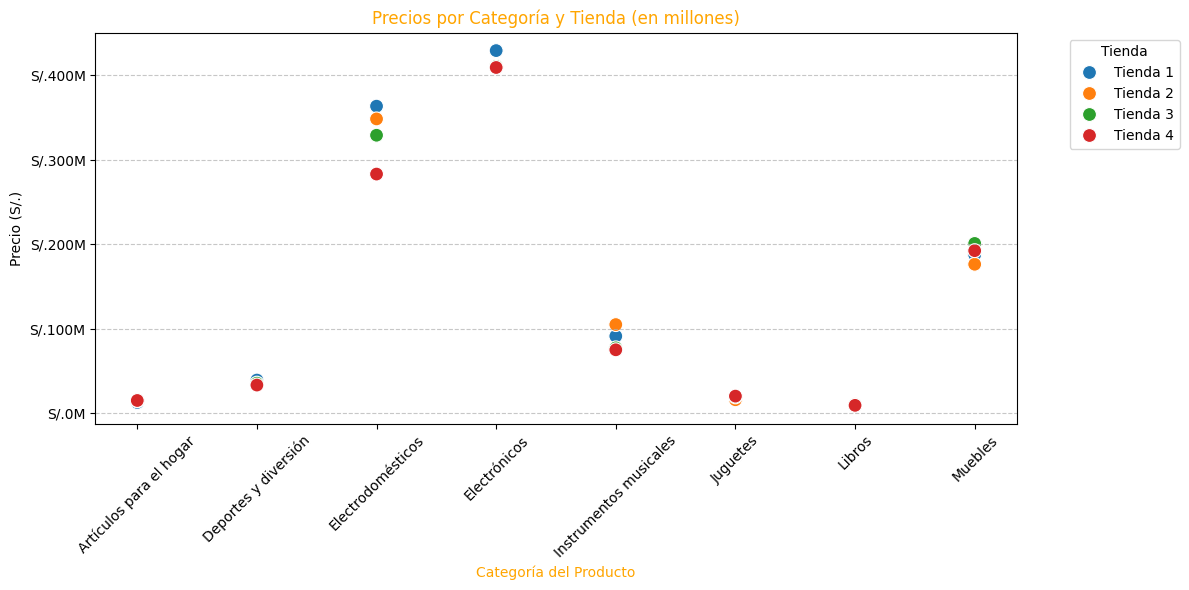

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

plt.figure(figsize=(12, 6))

# Gráfico de dispersión
sns.scatterplot(data=orden_columna, x="Categoría del Producto", y="Precio", hue="Tienda", s=100)

# Formato del eje Y en millones
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"S/.{x/1e6:.0f}M"))

# Personalización
plt.title("Precios por Categoría y Tienda (en millones)", color="orange")
plt.xlabel("Categoría del Producto", color="orange")
plt.ylabel("Precio (S/.)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Tienda", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [28]:
# Calculando el promedio de envío con mean
envio = tienda["Costo de envío"].mean()
envio2 = tienda2["Costo de envío"].mean()
envio3 = tienda3["Costo de envío"].mean()
envio4 = tienda4["Costo de envío"].mean()

In [29]:
# creando la tabla para visualizar
promedios_envío = pd.DataFrame({
    "Tienda": ["Tienda 1: ", "Tienda 2: ", "Tienda 3: ", "tienda 4: "],
    "Promedio de Costo de envío": [envio, envio2, envio3, envio4]
})
print("Promedios de la Calificación: ")
# redondemos a 2 decimales con el lambda, sino manda muchas decimales
promedios_envío["Promedio de Costo de envío"] = promedios_envío["Promedio de Costo de envío"].apply(lambda x: round(x, 2))
print(promedios_envío)

Promedios de la Calificación: 
       Tienda  Promedio de Costo de envío
0  Tienda 1:                     26018.61
1  Tienda 2:                     25216.24
2  Tienda 3:                     24805.68
3  tienda 4:                     23459.46


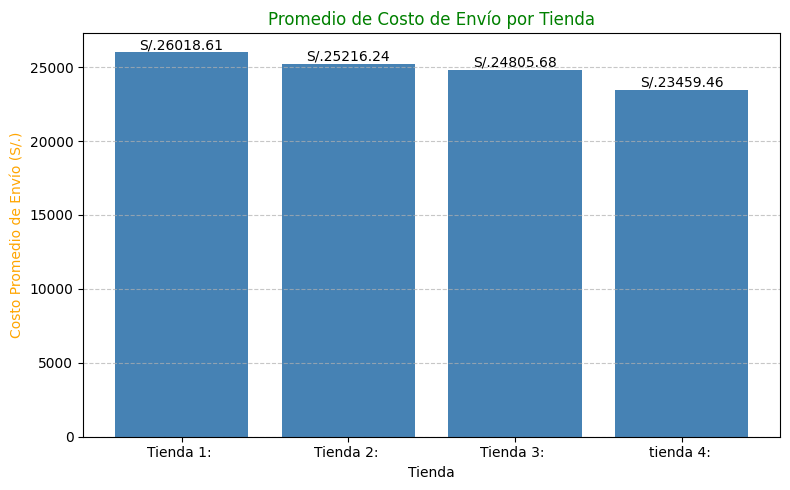

In [36]:
import matplotlib.pyplot as plt

# Gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(promedios_envío["Tienda"], promedios_envío["Promedio de Costo de envío"], color="steelblue")

# Personalización
plt.title("Promedio de Costo de Envío por Tienda", color="green")
plt.xlabel("Tienda")
plt.ylabel("Costo Promedio de Envío (S/.)", color="orange")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Etiquetas encima de cada barra
for i, valor in enumerate(promedios_envío["Promedio de Costo de envío"]):
    plt.text(i, valor + 0.05, f"S/.{valor}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

**Recomendación:**

El Sr. João debería cerrar Tienda 4, porque:
• 	Tiene el costo de envío más alto entre las tiendas más dispersas.
• 	Presenta productos con precios atípicos, lo que puede afectar la confianza del cliente.
• 	No ofrece ventajas competitivas frente a las demás tiendas.